# Facial Emotion Recogniton:
- dataset: Face_Emotion.csv
- Methods: CNN

## pre-process:


In [0]:
# necessary setting:
%matplotlib inline

### library type:
- normal data process library :
  1. numpy/pandas/matplotlib
- data process library and evaluation :
  1. sklearn : split / evaluation
- CNN :
  1. tensorflow-keras / pytorch-nn
- colab google:


In [2]:
# import library:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## data process:

In [0]:
# load:
data=pd.read_csv("gdrive/My Drive/Face_Emotion.csv")

In [0]:
# process data from csv to useable
X=data["pixels"].tolist()
width, height = 48, 48

train=[]
for img in X:
  x=[int(i) for i in img.split(" ")]
  x = np.asarray(x).reshape(width, height)
  train.append(x.astype('float32'))
  
train = np.asarray(train)
train = np.expand_dims(train, -1)


In [0]:
# normalize:
x = train
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
train=x

In [6]:
# one hot encoding: 
y = pd.get_dummies(data['emotion']).as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
# split to train and test :
x_train,x_val,y_train,y_val=train_test_split(train, y, test_size=0.1, random_state=2)



In [0]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0], dtype=uint8)

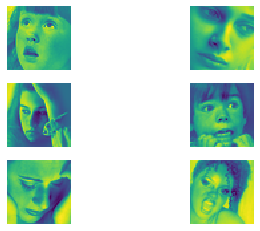

In [8]:
# show some data :
fig=plt.figure()
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.axis("off")
  plt.imshow(x_train[i].reshape((48,48)))


## CNN structure:

In [16]:
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#desinging the CNN
num_features = 64
num_labels = 7
batch_size = 64
epochs = 10
width, height = 48, 48
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 12, 12, 256)     

## train CNN:

In [0]:
# optimizer:
optimizor=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

In [0]:
# compile:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizor,
              metrics=['accuracy'])

In [21]:
# train:
model.fit(np.array(x_train), np.array(y_train),
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(np.array(x_val), np.array(y_val)),
          shuffle=True)

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 28s 872us/step - loss: 1.7070 - acc: 0.3113 - val_loss: 1.5800 - val_acc: 0.3670
Epoch 2/20
32298/32298 [==============================] - 28s 874us/step - loss: 1.5593 - acc: 0.3844 - val_loss: 1.4695 - val_acc: 0.4221
Epoch 3/20
32298/32298 [==============================] - 28s 869us/step - loss: 1.4724 - acc: 0.4278 - val_loss: 1.4060 - val_acc: 0.4561
Epoch 4/20
32298/32298 [==============================] - 28s 868us/step - loss: 1.4125 - acc: 0.4590 - val_loss: 1.3671 - val_acc: 0.4798
Epoch 5/20
32298/32298 [==============================] - 28s 868us/step - loss: 1.3663 - acc: 0.4766 - val_loss: 1.2897 - val_acc: 0.4982
Epoch 6/20
32298/32298 [==============================] - 28s 865us/step - loss: 1.3308 - acc: 0.4999 - val_loss: 1.3022 - val_acc: 0.5038
Epoch 7/20
32298/32298 [==============================] - 28s 866us/step - loss: 1.2988 - acc: 0.5172 - val_loss: 1.3

## References:
[link](https://medium.com/themlblog/how-to-do-facial-emotion-recognition-using-a-cnn-b7bbae79cd8f!)

## Summary:

- Preprocess:
  normalization
  one-hot encoding 

- Model:
  vuecnn 

- Ps:
### Batch normalization 
